In [122]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [123]:
def wordspacer(link, iteratblewords):
    data = pd.read_csv(link, delimiter=" ", names=("x", "y", "pressure", "onpaper", "time"))
    data["diff"] = data["onpaper"].diff()
    start_points = np.where(data["diff"]==1)[0]
    end_points = np.where(data["diff"]==-1)[0]-1

    returndict= {}
    for nr, word in enumerate(iteratblewords):
        returndict[word] = (start_points[nr], end_points[nr])
    
    return returndict



In [124]:
finaldict = {}

tasks = {
   "T6": ['l', 'm', 'p'],
   "T7": ['n', 'l', 'o', 'g'],
   "T8": ["llll"],
   "T9": ["lelelele"],
   "T10": ["foglio"],
   "T11": ["foglio"],
   "T12": ["mamma"],
   "T13": ["mamma"],
   "T14": ["telefono", "eone", "negozio"],
   "T15": ["bottiglia-reverse"],
   "T16": ["casa-reverse"],
   "T17": ["pane", "mela", "prosciutto", "ciliegia", "lonfo", "taganaccio"],
   "T18": ["sedia"],
   "T22": ["phonenr"],
   "T23": ["phonenr2"]
}

In [125]:
for i in range(1,99):
    if i<10:
        patientnr = f"0{i}"
    else:
        patientnr = i

    for item in tasks.items():
        # Healthy patients
        try:
            link = f"DARWIN-RAW\H{patientnr}\{item[0]}.txt"
            toadd = wordspacer(link, item[1])
            finaldict[link] = (toadd, "healthy")
            
        except:
            print(f"Unparsable data for task {item[0]} for healthy patient {i}")

        # Alzheimer patients
        try:
            link = f"DARWIN-RAW\P{patientnr}\{item[0]}.txt"
            toadd = wordspacer(link, item[1])
            finaldict[link] = (toadd, "alzheimer")
            
        except:
            print(f"Unparsable data for task {item[0]} for alzheimer patient {i}")
            
            

    

No data for task T6 for healthy patient 1
No data for task T7 for healthy patient 1
No data for task T8 for healthy patient 1
No data for task T9 for healthy patient 1
No data for task T9 for alzheimer patient 1
No data for task T10 for healthy patient 1
No data for task T11 for healthy patient 1
No data for task T12 for healthy patient 1
No data for task T13 for healthy patient 1
No data for task T13 for alzheimer patient 1
No data for task T14 for healthy patient 1
No data for task T6 for healthy patient 2
No data for task T7 for healthy patient 2
No data for task T8 for healthy patient 2
No data for task T9 for healthy patient 2
No data for task T10 for healthy patient 2
No data for task T11 for healthy patient 2
No data for task T12 for healthy patient 2
No data for task T13 for healthy patient 2
No data for task T14 for healthy patient 2
No data for task T15 for healthy patient 2
No data for task T16 for healthy patient 2
No data for task T17 for healthy patient 2
No data for task

In [126]:
finaldict

{'DARWIN-RAW\\P01\\T6.txt': ({'l': (378, 458),
   'm': (867, 1015),
   'p': (1264, 1355)},
  'alzheimer'),
 'DARWIN-RAW\\P01\\T7.txt': ({'n': (322, 429),
   'l': (518, 584),
   'o': (684, 739),
   'g': (954, 1049)},
  'alzheimer'),
 'DARWIN-RAW\\P01\\T8.txt': ({'llll': (235, 1112)}, 'alzheimer'),
 'DARWIN-RAW\\P01\\T10.txt': ({'foglio': (264, 416)}, 'alzheimer'),
 'DARWIN-RAW\\P01\\T11.txt': ({'foglio': (141, 388)}, 'alzheimer'),
 'DARWIN-RAW\\P01\\T12.txt': ({'mamma': (166, 393)}, 'alzheimer'),
 'DARWIN-RAW\\P01\\T14.txt': ({'telefono': (41, 135),
   'eone': (256, 296),
   'negozio': (339, 1088)},
  'alzheimer'),
 'DARWIN-RAW\\H01\\T15.txt': ({'bottiglia-reverse': (121, 275)}, 'healthy'),
 'DARWIN-RAW\\P01\\T15.txt': ({'bottiglia-reverse': (912, 1380)}, 'alzheimer'),
 'DARWIN-RAW\\H01\\T16.txt': ({'casa-reverse': (221, 526)}, 'healthy'),
 'DARWIN-RAW\\P01\\T16.txt': ({'casa-reverse': (523, 1416)}, 'alzheimer'),
 'DARWIN-RAW\\H01\\T17.txt': ({'pane': (122, 158),
   'mela': (179, 385),


<function matplotlib.pyplot.show(close=None, block=None)>

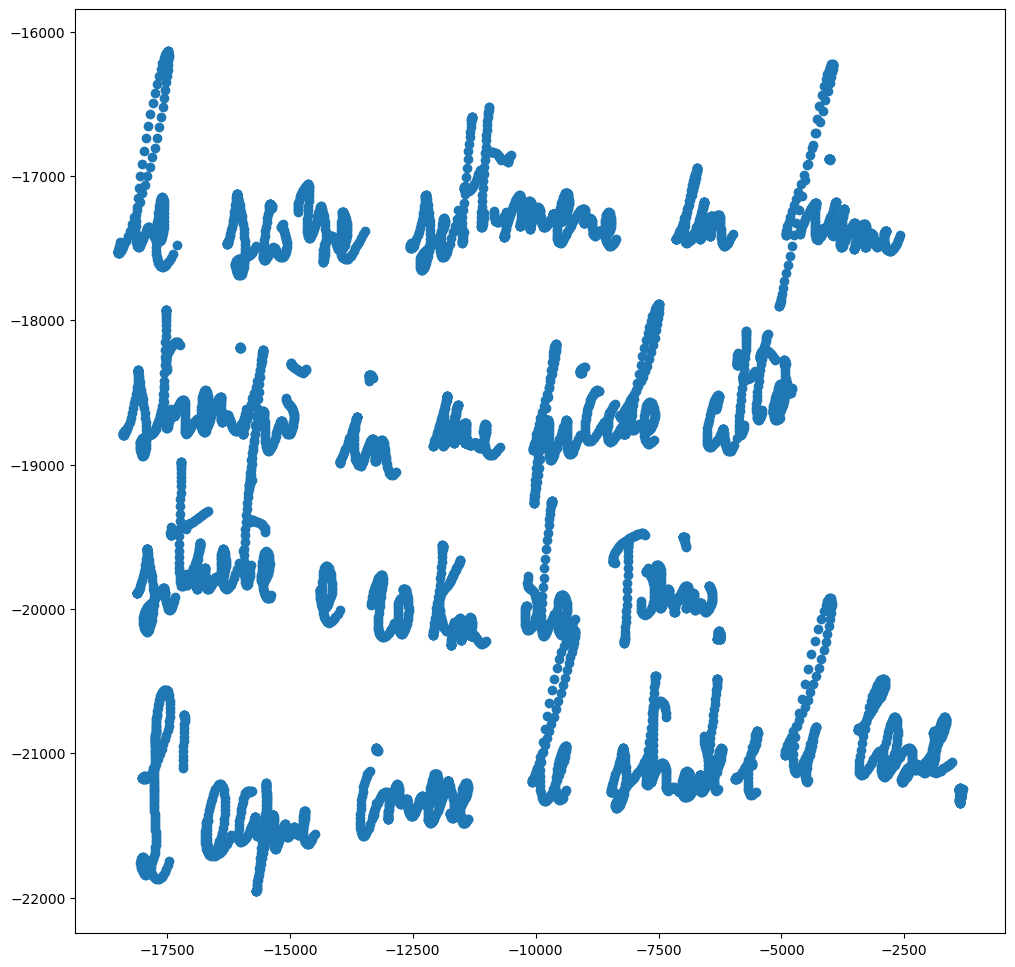

In [127]:
link = "DARWIN-RAW\H38\T25.txt"

data = pd.read_csv(link, delimiter=" ", names=("x", "y", "pressure", "onpaper", "time"))
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(-data[data["onpaper"]==1]["y"], -data[data["onpaper"]==1]["x"])
plt.show

In [128]:
len(finaldict.keys())

2524

In [135]:
import json
from numpyencoder import NumpyEncoder

with open('data.json', 'w') as fp:
    json.dump(finaldict, fp, indent=2, cls=NumpyEncoder)